In [131]:
import os
os.chdir("C:\\Users\\User\\Desktop\\Veri Setleri")
os.getcwd()

'C:\\Users\\User\\Desktop\\Veri Setleri'

In [132]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


from warnings import filterwarnings
filterwarnings('ignore')

In [133]:
data = pd.read_csv("finans.csv")

In [134]:
df = data.copy()

In [135]:
df = df.dropna()

In [136]:
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [168]:
df.shape

(6167, 136)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6167 entries, 0 to 6166
Columns: 136 entries, ind_5 to 90_target
dtypes: float64(88), int64(45), object(3)
memory usage: 6.4+ MB


In [139]:
for col in df.select_dtypes(include=['object']).columns:
    print(col)


ind_109
ind_420
ind_422


In [140]:
X = df.drop(['20_target','50_target','90_target','ind_109','ind_420','ind_422'], axis=1).astype("float64")
y= df["20_target"]

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("X_train", X_train.shape)
print("Y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

training = df.copy()
print("training",training.shape)


X_train (4625, 130)
Y_train (4625,)
X_test (1542, 130)
y_test (1542,)
training (6167, 136)


In [141]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA()

In [143]:
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_train[0:1,:]

array([[ 8.79809597e+00, -4.62828203e+00,  1.88130331e+00,
         1.72924104e+00, -2.01188751e+00,  1.48575040e+00,
        -1.10044010e+00, -3.25525858e-01, -1.87164039e+00,
        -3.85195305e-01,  4.03939047e-01, -1.41166275e-01,
         1.13234533e+00, -4.62267076e-01, -1.22001547e+00,
        -4.43475138e-01,  1.44279533e+00,  1.76865675e+00,
        -4.12856412e-01, -8.92108923e-01, -3.57493090e-01,
        -1.33610622e+00,  4.00764536e-01, -5.05724314e-01,
         1.52160280e+00,  6.37312261e-02,  5.32124830e-01,
        -9.34096825e-01,  4.11863839e-01, -7.63846871e-01,
         4.09624292e-01, -2.02114886e-01,  1.65641076e-01,
        -6.66345804e-01,  6.85188178e-01, -3.91826777e-01,
         1.09748098e+00, -9.50330982e-01,  4.95284545e-01,
        -3.32132489e-01,  1.05989384e+00,  3.07289304e-01,
         1.21774154e-01,  5.87495973e-01, -3.66367563e-01,
        -5.74707664e-02,  1.06012976e+00, -2.59164367e-01,
        -6.31714571e-01,  2.47569306e-01,  4.14538238e-0

In [144]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 37.16,  49.38,  55.56,  60.03,  63.2 ,  66.22,  68.94,  70.99,
        72.72,  74.38,  75.93,  77.35,  78.73,  79.97,  81.16,  82.3 ,
        83.29,  84.23,  85.1 ,  85.89,  86.66,  87.36,  88.05,  88.68,
        89.29,  89.87,  90.43,  90.95,  91.41,  91.86,  92.29,  92.69,
        93.06,  93.43,  93.78,  94.11,  94.42,  94.72,  95.01,  95.28,
        95.53,  95.77,  96.  ,  96.22,  96.43,  96.63,  96.82,  97.  ,
        97.17,  97.32,  97.46,  97.6 ,  97.73,  97.86,  97.98,  98.09,
        98.19,  98.28,  98.37,  98.46,  98.55,  98.64,  98.72,  98.8 ,
        98.88,  98.95,  99.02,  99.08,  99.14,  99.19,  99.24,  99.29,
        99.34,  99.38,  99.42,  99.46,  99.5 ,  99.53,  99.56,  99.59,
        99.62,  99.65,  99.68,  99.71,  99.74,  99.76,  99.78,  99.8 ,
        99.82,  99.84,  99.86,  99.88,  99.89,  99.9 ,  99.91,  99.92,
        99.93,  99.94,  99.95,  99.96,  99.97,  99.98,  99.99, 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  ,
      

([<matplotlib.axis.XTick at 0x20b36adeb08>,
 <a list of 130 Text xticklabel objects>)

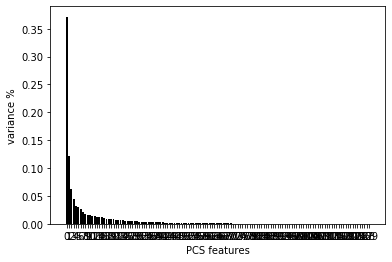

In [145]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color="black")
plt.xlabel('PCS features')
plt.ylabel('variance %')
plt.xticks(features)

In [171]:
def pca_fon(X, threshold):
    pca = PCA()
    X_pca = pca.fit_transform(scale(X))
    arr = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)
    num_var = sum((arr < threshold*100)) + 1 
    print('PCA İLE ANLAMLI DEĞİŞKEN SAYISI: ',num_var)
    X_pcad = pd.DataFrame(X_pca[:,0:num_var], index = X.index)
    return X_pcad

In [178]:
x = pca_fon(X, 0.65)

PCA İLE ANLAMLI DEĞİŞKEN SAYISI:  6


In [187]:
pca = PCA(n_components=6)
X_reduced_train = pca.fit_transform(scale(X_train))

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)


In [188]:
pcr_model.intercept_

-0.22377288750702706

In [189]:
pcr_model.coef_

array([-0.10100767,  0.24462528,  0.12600178,  0.04961467,  0.06374387,
       -0.05931702])

In [190]:

y_pred = pcr_model.predict(X_reduced_train)
y_pred[0:5]

array([-2.13820861, -0.71501474, -1.34579143, -0.11422325, -0.46793959])

In [191]:
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(y_train, y_pred))

14.789453716081532

In [192]:
r2_score(y_train, y_pred)


0.007333786626233518

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              20_target   R-squared (uncentered):                   0.072
Model:                            OLS   Adj. R-squared (uncentered):              0.052
Method:                 Least Squares   F-statistic:                              3.591
Date:                Thu, 06 Aug 2020   Prob (F-statistic):                    1.51e-37
Time:                        15:00:09   Log-Likelihood:                         -25153.
No. Observations:                6167   AIC:                                  5.057e+04
Df Residuals:                    6037   BIC:                                  5.144e+04
Df Model:                         130                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_5          0.0747      0.339      0.220      0.826      -0.590       0.739
ind_6          0.2343      0.274      0.855      0.393      -0.303       0.772
ind_8      -6.577e+07   5.35e+07     -1.229      0.219   -1.71e+08    3.91e+07
ind_9       6.577e+07   5.35e+07      1.229      0.219   -3.91e+07    1.71e+08
ind_10      6.577e+07   5.35e+07      1.229      0.219   -3.91e+07    1.71e+08
ind_12         0.2949      0.798      0.369      0.712      -1.270       1.860
ind_13        -0.0145      0.010     -1.470      0.142      -0.034       0.005
ind_14         0.0721      0.068      1.065      0.287      -0.061       0.205
ind_15        -0.1290      0.098     -1.311      0.190      -0.322       0.064
ind_16        -0.0102      0.147     -0.069      0.945      -0.298       0.278
ind_17         0.3139      0.155      2.028      0.043       0.010       0.617
ind_18         0.3673      0.111      3.303      0.001       0.149       0.585
ind_19         0.0470      0.525      0.089      0.929      -0.982       1.076
ind_20        -0.4086      0.421     -0.970      0.332      -1.234       0.417
ind_21         0.4206      0.500      0.841      0.400      -0.560       1.401
ind_22         0.1741      0.130      1.343      0.179      -0.080       0.428
ind_23         0.0902      0.131      0.690      0.490      -0.166       0.347
ind_25      1.819e+05   4.01e+05      0.453      0.650   -6.05e+05    9.69e+05
ind_26       1.82e+05   4.01e+05      0.454      0.650   -6.05e+05    9.69e+05
ind_27     -3.642e+05   8.03e+05     -0.454      0.650   -1.94e+06    1.21e+06
ind_28        -0.0077      0.005     -1.674      0.094      -0.017       0.001
ind_29        -0.0046      0.007     -0.629      0.529      -0.019       0.010
ind_30        -0.0225      0.008     -2.748      0.006      -0.039      -0.006
ind_31         0.0126      0.011      1.120      0.263      -0.009       0.035
ind_32        -0.0152      0.011     -1.439      0.150      -0.036       0.006
ind_33         0.0056      0.010      0.560      0.576      -0.014       0.025
ind_34         0.0261      0.011      2.327      0.020       0.004       0.048
ind_35        -0.0309      0.009     -3.378      0.001      -0.049      -0.013
ind_36        -0.0052      0.007     -0.762      0.446      -0.019       0.008
ind_37         0.0305      0.007      4.484      0.000       0.017       0.044
ind_39        -0.0040      0.032     -0.122      0.903      -0.067       0.059
ind_40        -1.0360      0.501     -2.067      0.039      -2.019      -0.053
ind_41        -0.0276      0.030     -0.933      0.351      -0.086       0.030
ind_42         0.0689      0.149      0.462      0.644      -0.223       0.361
ind_43         0.1074      0.099      1.090      0.276      -

In [200]:
lm = sm.OLS(y, X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              20_target   R-squared (uncentered):                   0.072
Model:                            OLS   Adj. R-squared (uncentered):              0.052
Method:                 Least Squares   F-statistic:                              3.591
Date:                Thu, 06 Aug 2020   Prob (F-statistic):                    1.51e-37
Time:                        15:01:34   Log-Likelihood:                         -25153.
No. Observations:                6167   AIC:                                  5.057e+04
Df Residuals:                    6037   BIC:                                  5.144e+04
Df Model:                         130                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_5          0.0747      0.339      0.220      0.826      -0.590       0.739
ind_6          0.2343      0.274      0.855      0.393      -0.303       0.772
ind_8      -6.577e+07   5.35e+07     -1.229      0.219   -1.71e+08    3.91e+07
ind_9       6.577e+07   5.35e+07      1.229      0.219   -3.91e+07    1.71e+08
ind_10      6.577e+07   5.35e+07      1.229      0.219   -3.91e+07    1.71e+08
ind_12         0.2949      0.798      0.369      0.712      -1.270       1.860
ind_13        -0.0145      0.010     -1.470      0.142      -0.034       0.005
ind_14         0.0721      0.068      1.065      0.287      -0.061       0.205
ind_15        -0.1290      0.098     -1.311      0.190      -0.322       0.064
ind_16        -0.0102      0.147     -0.069      0.945      -0.298       0.278
ind_17         0.3139      0.155      2.028      0.043       0.010       0.617
ind_18         0.3673      0.111      3.303      0.001       0.149       0.585
ind_19         0.0470      0.525      0.089      0.929      -0.982       1.076
ind_20        -0.4086      0.421     -0.970      0.332      -1.234       0.417
ind_21         0.4206      0.500      0.841      0.400      -0.560       1.401
ind_22         0.1741      0.130      1.343      0.179      -0.080       0.428
ind_23         0.0902      0.131      0.690      0.490      -0.166       0.347
ind_25      1.819e+05   4.01e+05      0.453      0.650   -6.05e+05    9.69e+05
ind_26       1.82e+05   4.01e+05      0.454      0.650   -6.05e+05    9.69e+05
ind_27     -3.642e+05   8.03e+05     -0.454      0.650   -1.94e+06    1.21e+06
ind_28        -0.0077      0.005     -1.674      0.094      -0.017       0.001
ind_29        -0.0046      0.007     -0.629      0.529      -0.019       0.010
ind_30        -0.0225      0.008     -2.748      0.006      -0.039      -0.006
ind_31         0.0126      0.011      1.120      0.263      -0.009       0.035
ind_32        -0.0152      0.011     -1.439      0.150      -0.036       0.006
ind_33         0.0056      0.010      0.560      0.576      -0.014       0.025
ind_34         0.0261      0.011      2.327      0.020       0.004       0.048
ind_35        -0.0309      0.009     -3.378      0.001      -0.049      -0.013
ind_36        -0.0052      0.007     -0.762      0.446      -0.019       0.008
ind_37         0.0305      0.007      4.484      0.000       0.017       0.044
ind_39        -0.0040      0.032     -0.122      0.903      -0.067       0.059
ind_40        -1.0360      0.501     -2.067      0.039      -2.019      -0.053
ind_41        -0.0276      0.030     -0.933      0.351      -0.086       0.030
ind_42         0.0689      0.149      0.462      0.644      -0.223       0.361
ind_43         0.1074      0.099      1.090      0.276      -